# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [65]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [66]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | alice springs
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | college
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | aykhal
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | pandan
Processing Record 12 of Set 1 | dul'durga
Processing Record 13 of Set 1 | wailua homesteads
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | khandyga
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | alofi
Processing Record 18 of Set 1 | dudinka
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | udachny
Processing Record 21 of Set 1 | wenling
Processing Record 22

Processing Record 42 of Set 4 | terrace
Processing Record 43 of Set 4 | barcelos
Processing Record 44 of Set 4 | syktyvkar
Processing Record 45 of Set 4 | wanning
Processing Record 46 of Set 4 | hadibu
Processing Record 47 of Set 4 | flying fish cove
Processing Record 48 of Set 4 | doka
Processing Record 49 of Set 4 | utrik
Processing Record 0 of Set 5 | kununurra
Processing Record 1 of Set 5 | smidovich
Processing Record 2 of Set 5 | port saint john's
Processing Record 3 of Set 5 | fale old settlement
Processing Record 4 of Set 5 | queenstown
Processing Record 5 of Set 5 | westport
Processing Record 6 of Set 5 | vanino
Processing Record 7 of Set 5 | port elizabeth
Processing Record 8 of Set 5 | bilibino
Processing Record 9 of Set 5 | santa terezinha
Processing Record 10 of Set 5 | zhaoyuan
Processing Record 11 of Set 5 | brisas de zicatela
Processing Record 12 of Set 5 | petropavlovsk-kamchatsky
Processing Record 13 of Set 5 | alesund
Processing Record 14 of Set 5 | umba
Processing Re

Processing Record 35 of Set 8 | zhaoqing
Processing Record 36 of Set 8 | mhamid
Processing Record 37 of Set 8 | bhandara
Processing Record 38 of Set 8 | brookings
Processing Record 39 of Set 8 | elmendorf air force base
City not found. Skipping...
Processing Record 40 of Set 8 | copiapo
Processing Record 41 of Set 8 | atbasar
Processing Record 42 of Set 8 | grand falls-windsor
Processing Record 43 of Set 8 | murghob
Processing Record 44 of Set 8 | suai
City not found. Skipping...
Processing Record 45 of Set 8 | manavalakurichi
Processing Record 46 of Set 8 | andratx
Processing Record 47 of Set 8 | arkhangel'sk
Processing Record 48 of Set 8 | east ballina
Processing Record 49 of Set 8 | yagry
City not found. Skipping...
Processing Record 0 of Set 9 | dhuusamarreeb
Processing Record 1 of Set 9 | krasnoslobodsk
Processing Record 2 of Set 9 | cuito
Processing Record 3 of Set 9 | cill airne
Processing Record 4 of Set 9 | jinji
Processing Record 5 of Set 9 | helston
Processing Record 6 of Se

Processing Record 19 of Set 12 | dondo
Processing Record 20 of Set 12 | undurkhaan
Processing Record 21 of Set 12 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 22 of Set 12 | charlottetown
Processing Record 23 of Set 12 | korla
Processing Record 24 of Set 12 | swift current
Processing Record 25 of Set 12 | lejanias
Processing Record 26 of Set 12 | mandalay
Processing Record 27 of Set 12 | lorengau
Processing Record 28 of Set 12 | tillaberi
Processing Record 29 of Set 12 | bushehr
Processing Record 30 of Set 12 | pico truncado
Processing Record 31 of Set 12 | altai
Processing Record 32 of Set 12 | lethbridge
Processing Record 33 of Set 12 | linhares
Processing Record 34 of Set 12 | namibe
Processing Record 35 of Set 12 | taro
Processing Record 36 of Set 12 | burutu
Processing Record 37 of Set 12 | tsiombe
Processing Record 38 of Set 12 | banff
Processing Record 39 of Set 12 | seguela
Processing Record 40 of Set 12 | kamaishi
Processing Record 41 of Set 12 | nabire
Process

In [67]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [68]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,3.80,66,98,8.45,TF,1701018237
1,alice springs,-23.7000,133.8833,17.75,100,100,0.00,AU,1701018237
2,puerto natales,-51.7236,-72.4875,9.77,51,56,8.13,CL,1701018069
3,stanley,54.8680,-1.6985,3.20,92,75,0.51,GB,1701017992
4,puerto ayora,-0.7393,-90.3518,28.98,86,57,3.13,EC,1701018237


In [69]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [70]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.80,66,98,8.45,TF,1701018237
1,alice springs,-23.7000,133.8833,17.75,100,100,0.00,AU,1701018237
2,puerto natales,-51.7236,-72.4875,9.77,51,56,8.13,CL,1701018069
3,stanley,54.8680,-1.6985,3.20,92,75,0.51,GB,1701017992
4,puerto ayora,-0.7393,-90.3518,28.98,86,57,3.13,EC,1701018237


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

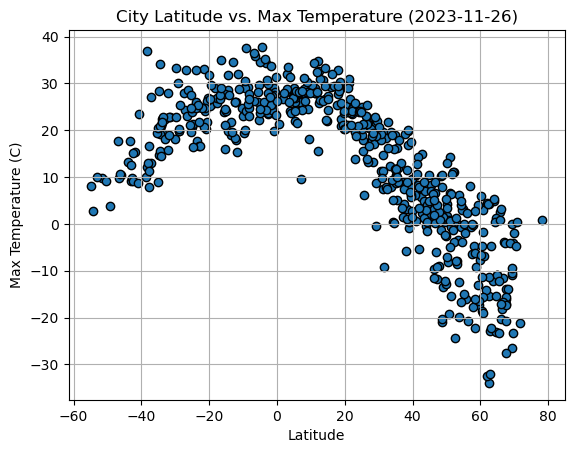

In [73]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-11-26)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

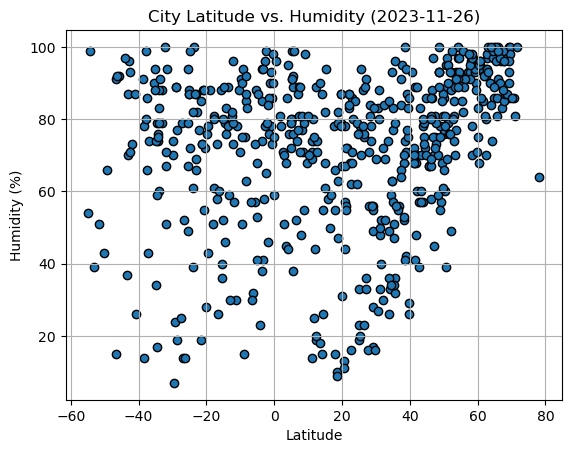

In [74]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-11-26)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

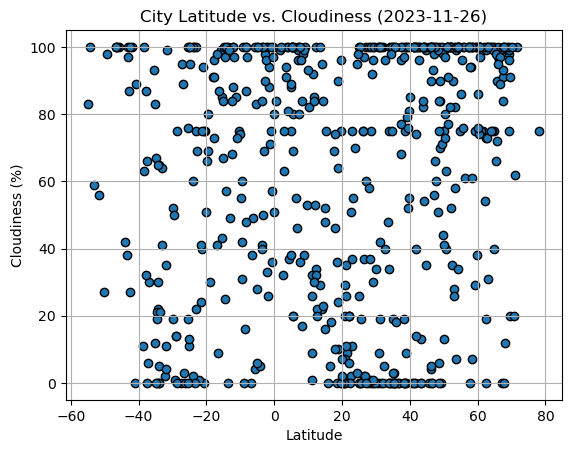

In [75]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-11-26)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

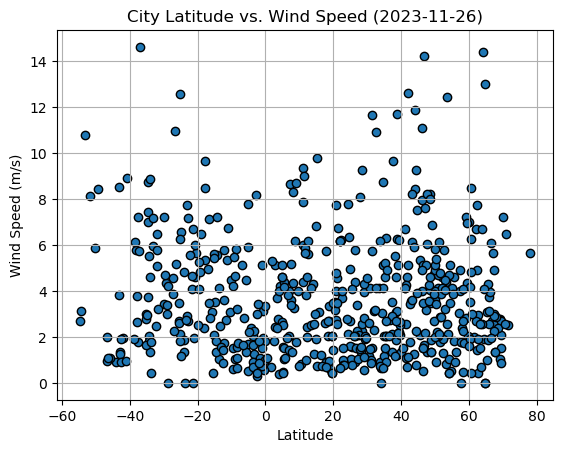

In [76]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-11-26)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [77]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)


In [78]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,stanley,54.8680,-1.6985,3.20,92,75,0.51,GB,1701017992
5,college,64.8569,-147.8028,-10.82,86,75,0.00,US,1701018237
6,longyearbyen,78.2186,15.6401,0.91,64,75,5.66,SJ,1701018013
7,jamestown,42.0970,-79.2353,7.77,60,100,5.14,US,1701018237
8,aykhal,66.0000,111.5000,-20.33,100,97,3.75,RU,1701018237


In [79]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.80,66,98,8.45,TF,1701018237
1,alice springs,-23.7000,133.8833,17.75,100,100,0.00,AU,1701018237
2,puerto natales,-51.7236,-72.4875,9.77,51,56,8.13,CL,1701018069
4,puerto ayora,-0.7393,-90.3518,28.98,86,57,3.13,EC,1701018237
9,margaret river,-33.9500,115.0667,19.43,60,65,4.59,AU,1701018237


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7648466702601919


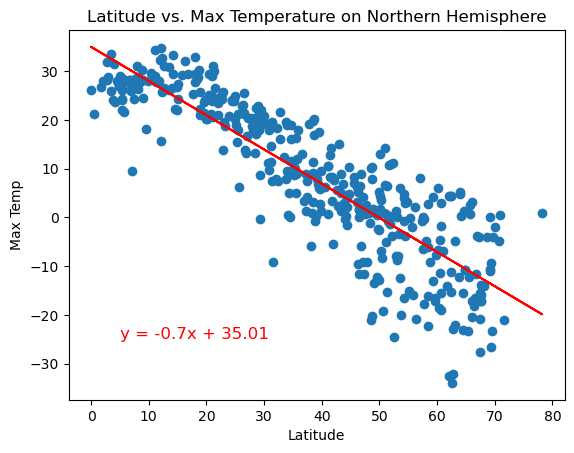

In [88]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Max Temperature on Northern Hemisphere")

line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (5,-25), fontsize=12, color="red")

correlation = f"Correlation: {round(rvalue, 2)}"
print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.4319617787331556


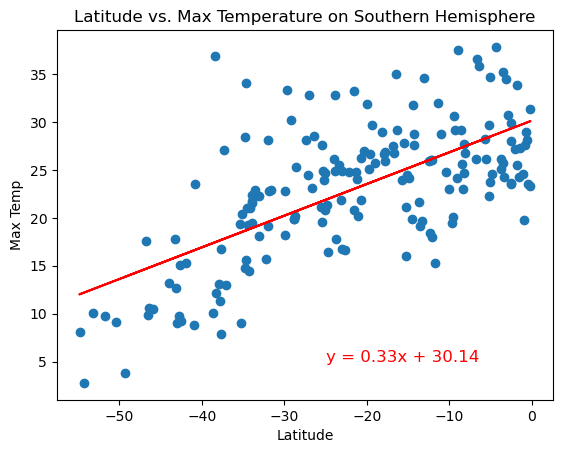

In [89]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Max Temperature on Southern Hemisphere")

line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (-25,5), fontsize=12, color="red")

correlation = f"Correlation: {round(rvalue, 2)}"
print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** 
For both Northern and Southern Hemisphere, there is a positive correlation between the latitude and the Max Temperautre of the city. This shows that the further away the city is from the equator, the temperature of the city gets colder. The strength of the association between the latitude and max temperature in the Northern Hemisphere (r = 0.76) has a stronger correlation. However, in the Southern Hemisphere (r = 0.43)the correlation would be regarded as moderate.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1624127490608597


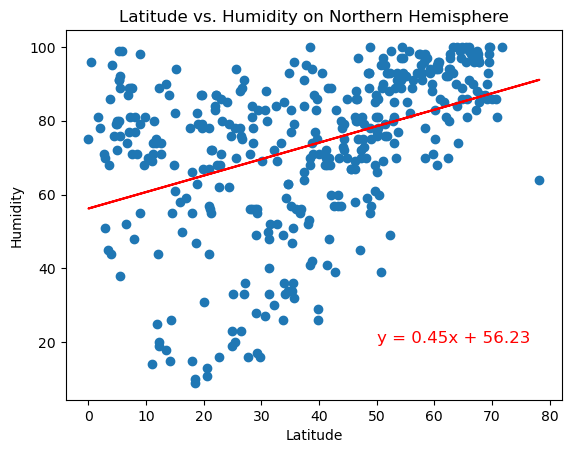

In [82]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity on Northern Hemisphere")

line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (50,20), fontsize=12, color="red")

correlation = f"Correlation: {round(rvalue, 2)}"
print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.0019503870548576846


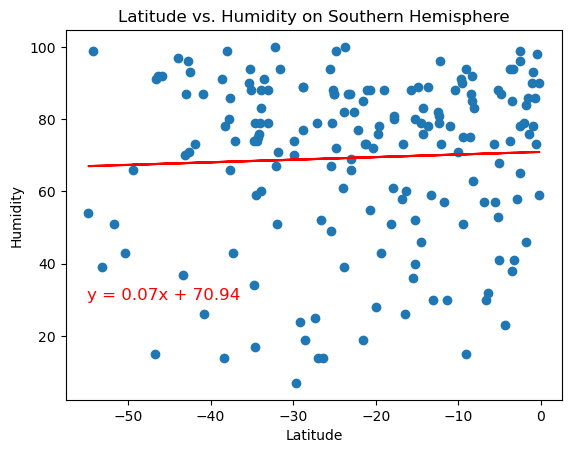

In [90]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity on Southern Hemisphere")

line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (-55,30), fontsize=12, color="red")

correlation = f"Correlation: {round(rvalue, 2)}"
print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:**
The relationship between the distance a city is from the equator in the Northern and Southern Hemisphere and the humidity is very weak. (r = 0.16 and r = 0.002 respectively). Because of the very weak corralation, we cannot say that humidty of the City increases the further it is from the equator. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.053598688026026305


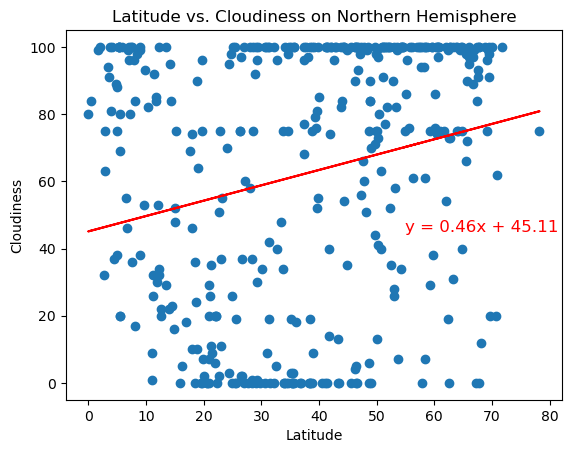

In [91]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness on Northern Hemisphere")

line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (55,45), fontsize=12, color="red")

correlation = f"Correlation: {round(rvalue, 2)}"
print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.022850909421295487


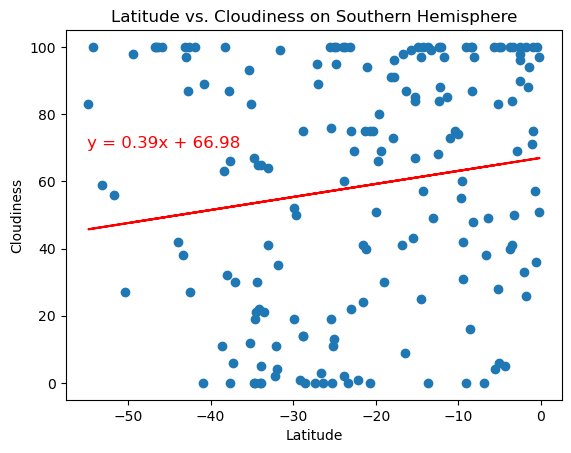

In [92]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness on Southern Hemisphere")

line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (-55,70), fontsize=12, color="red")

correlation = f"Correlation: {round(rvalue, 2)}"
print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:**
The regression value for both Hemispheres are 0.05 and 0.02. We can say that there is almost no corralation between the Latitude of the City and its Cloudiness. So the Cloudiness of a City is not affected by its distance from the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0013193426677550768


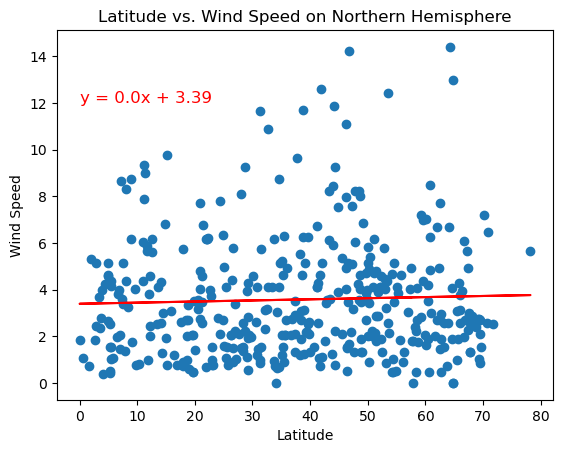

In [93]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed on Northern Hemisphere")

line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (0,12), fontsize=12, color="red")

correlation = f"Correlation: {round(rvalue, 2)}"
print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.06146780546442665


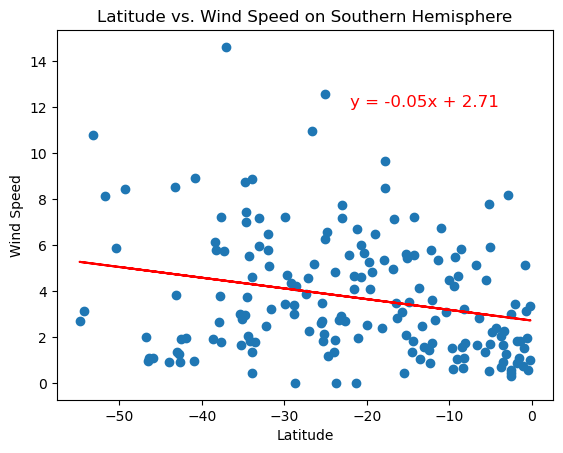

In [94]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed on Southern Hemisphere")

line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (-22,12), fontsize=12, color="red")

correlation = f"Correlation: {round(rvalue, 2)}"
print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** 
In the Nothern Hemisphere, there is no corralation between the Wind Speed with its distance of the City from the equator (r = 0.001). For the Southern Hemisphere, there is also a very weak relationship between the Wind Speed and its distance from the equator (r = 0.06), its corralation may be too weak to consider its association.